In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from google.colab import files
uploaded = files.upload()
#Importing the dataset
dataset = pd.read_csv('Dataset1.csv')
print(dataset.head())

Saving Dataset1.csv to Dataset1 (1).csv
   HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     0       1         1          1   40       1       0   
1                     0       0         0          0   25       1       0   
2                     0       1         1          1   28       0       0   
3                     0       1         0          1   27       0       0   
4                     0       1         1          1   24       0       0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0         0             0       0  ...              1            0        5   
1         0             1       0  ...              0            1        3   
2         0             0       1  ...              1            1        5   
3         0             1       1  ...              1            0        2   
4         0             1       1  ...              1            0        2   

   MentHlth  PhysHlth 

In [3]:
# Replace 2 with 1 in the Diabetes column
dataset['Diabetes'] = dataset['Diabetes'].replace(2, 1)

In [4]:
# Preprocessing
numerical_indices = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
scaler = MinMaxScaler()
dataset[numerical_indices] = scaler.fit_transform(dataset[numerical_indices])

In [5]:
# Define features and target based on feature importance
selected_features = ['Age', 'GenHlth', 'PhysHlth', 'HighBP', 'Income', 'Education', 'HighChol', 'DiffWalk', 'Sex', 'BMI', 'Diabetes', 'Stroke', 'MentHlth', 'Smoker']
X = dataset[selected_features]
y = dataset["HeartDiseaseorAttack"]

In [6]:
print(X.shape, y.shape)

(253680, 14) (253680,)


In [7]:
# Apply SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42, stratify=y_resampled)

In [9]:
# Train the model
# Import the desired model class
from sklearn.ensemble import RandomForestClassifier # Example: Import RandomForestClassifier
# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42)
# Fit the model
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

Number of trees in the RF model:  200


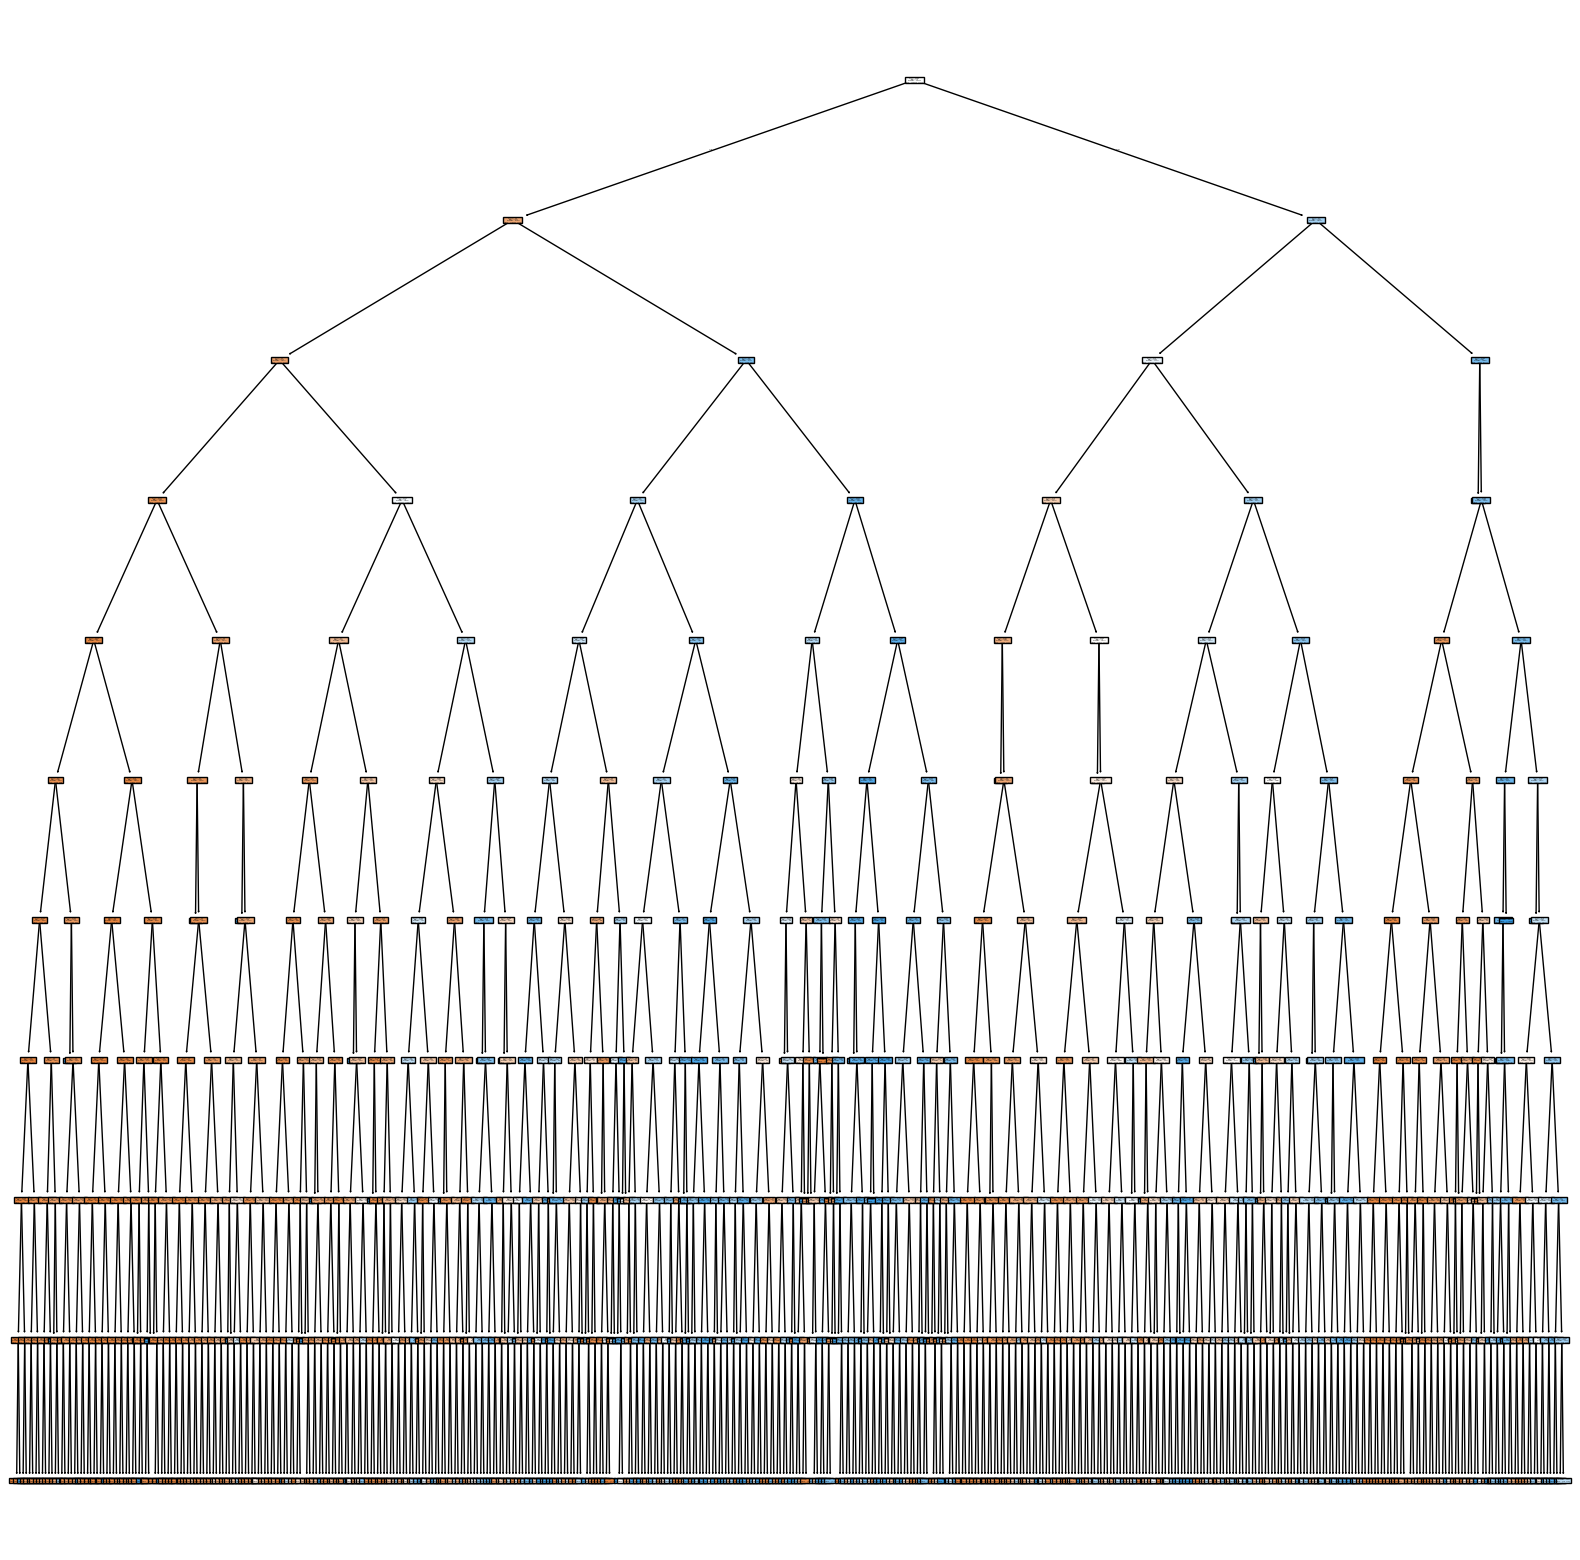

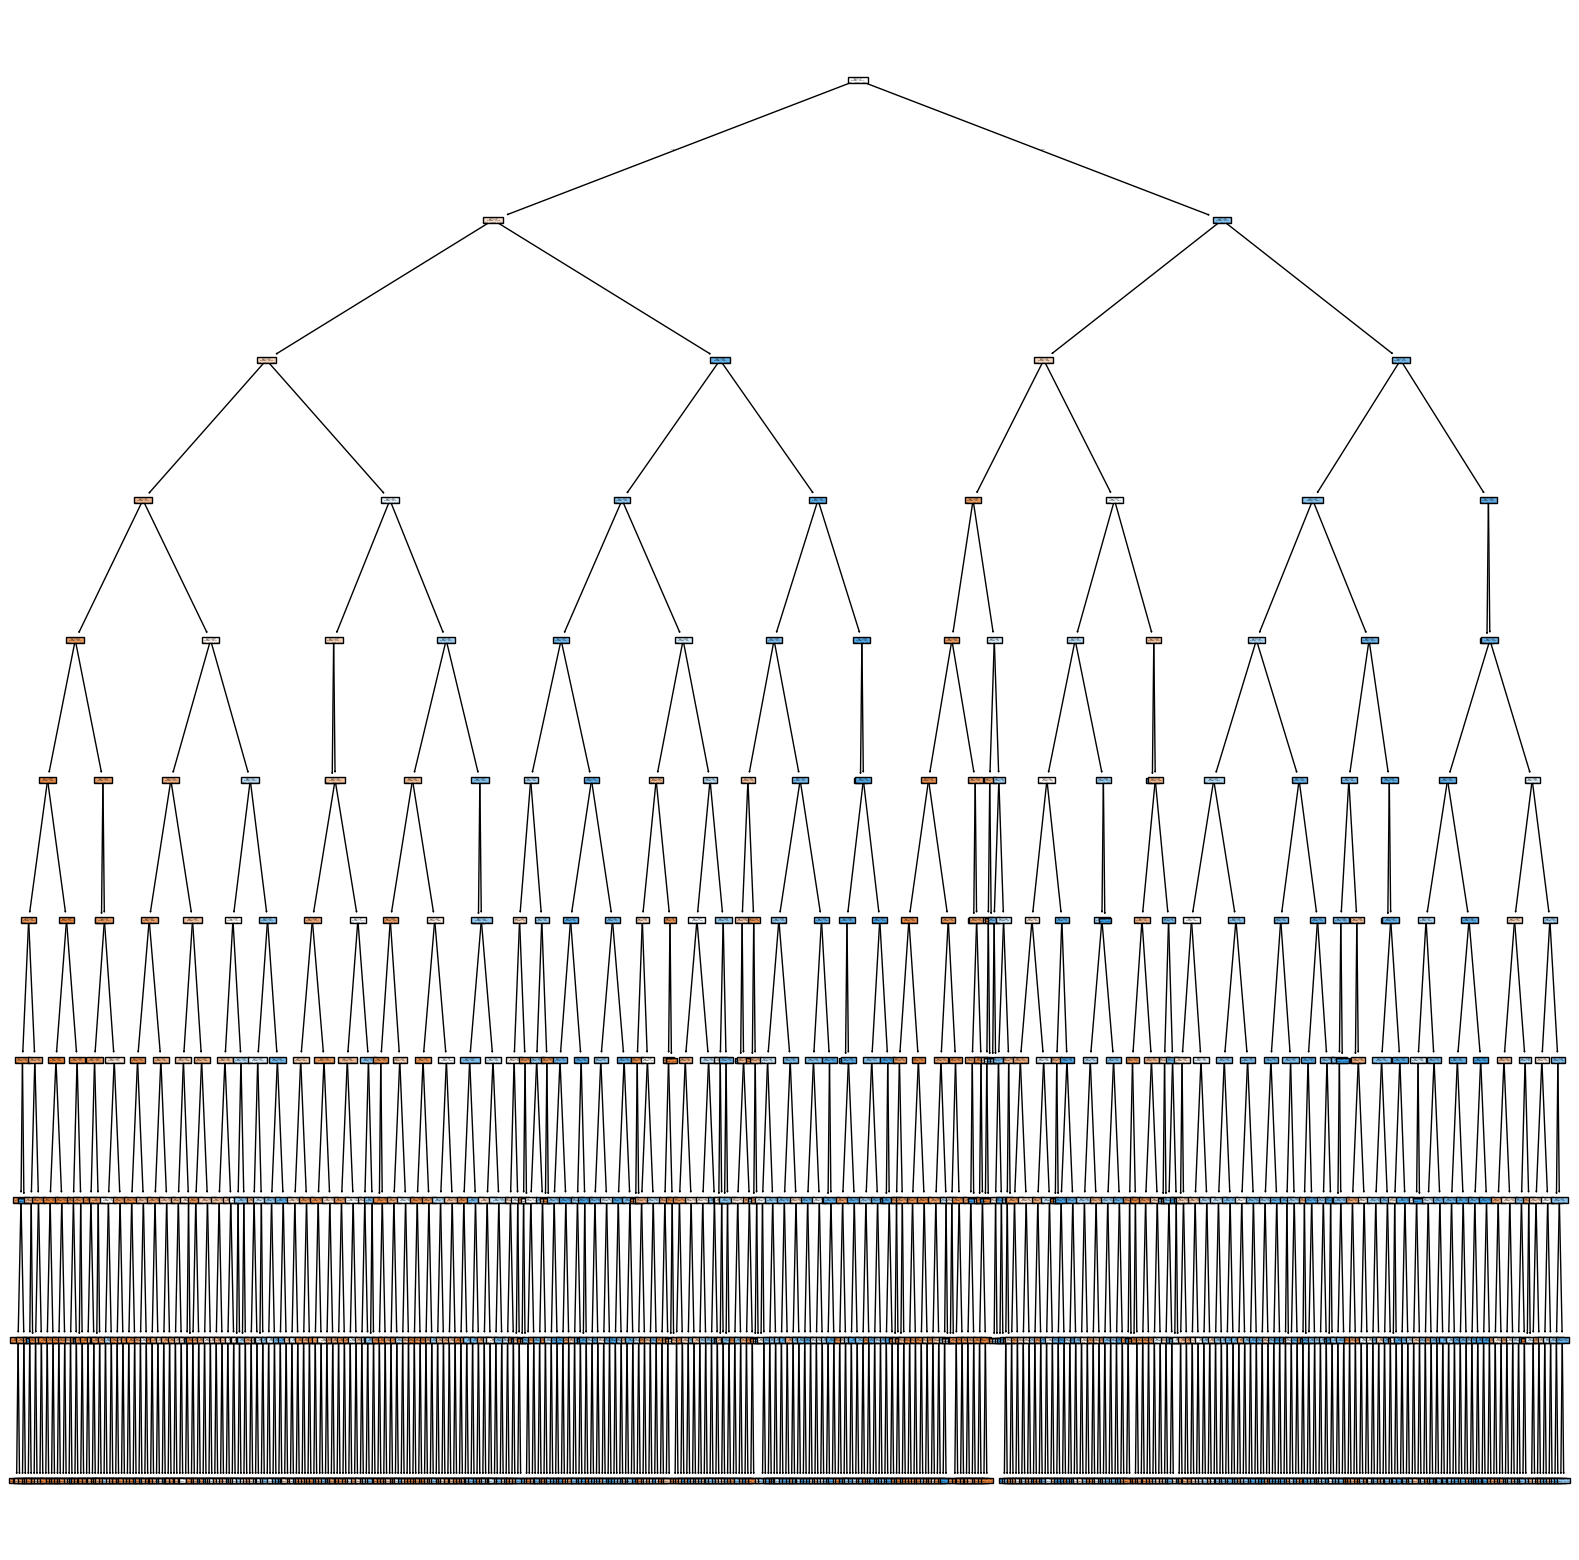

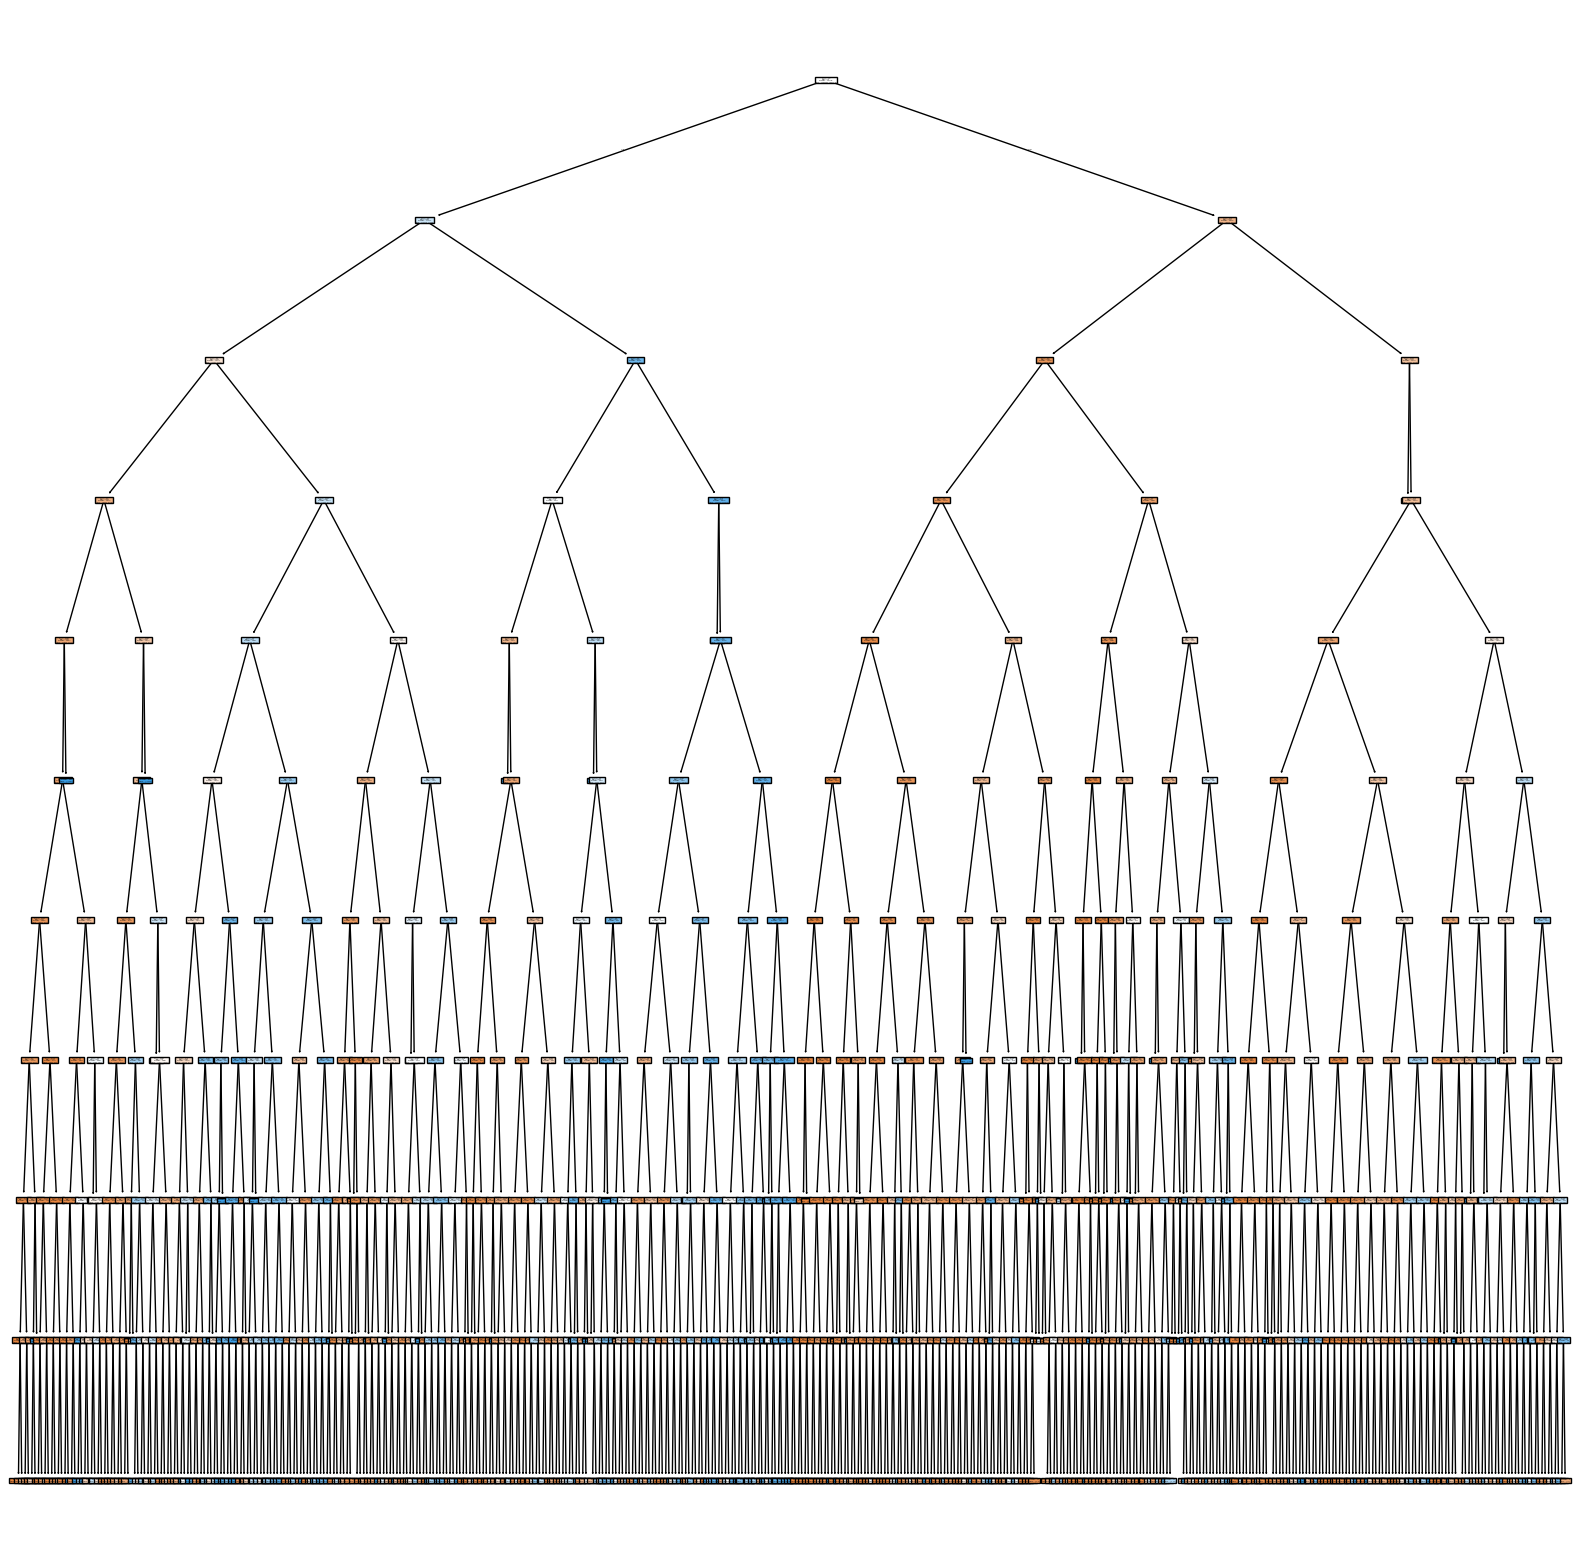

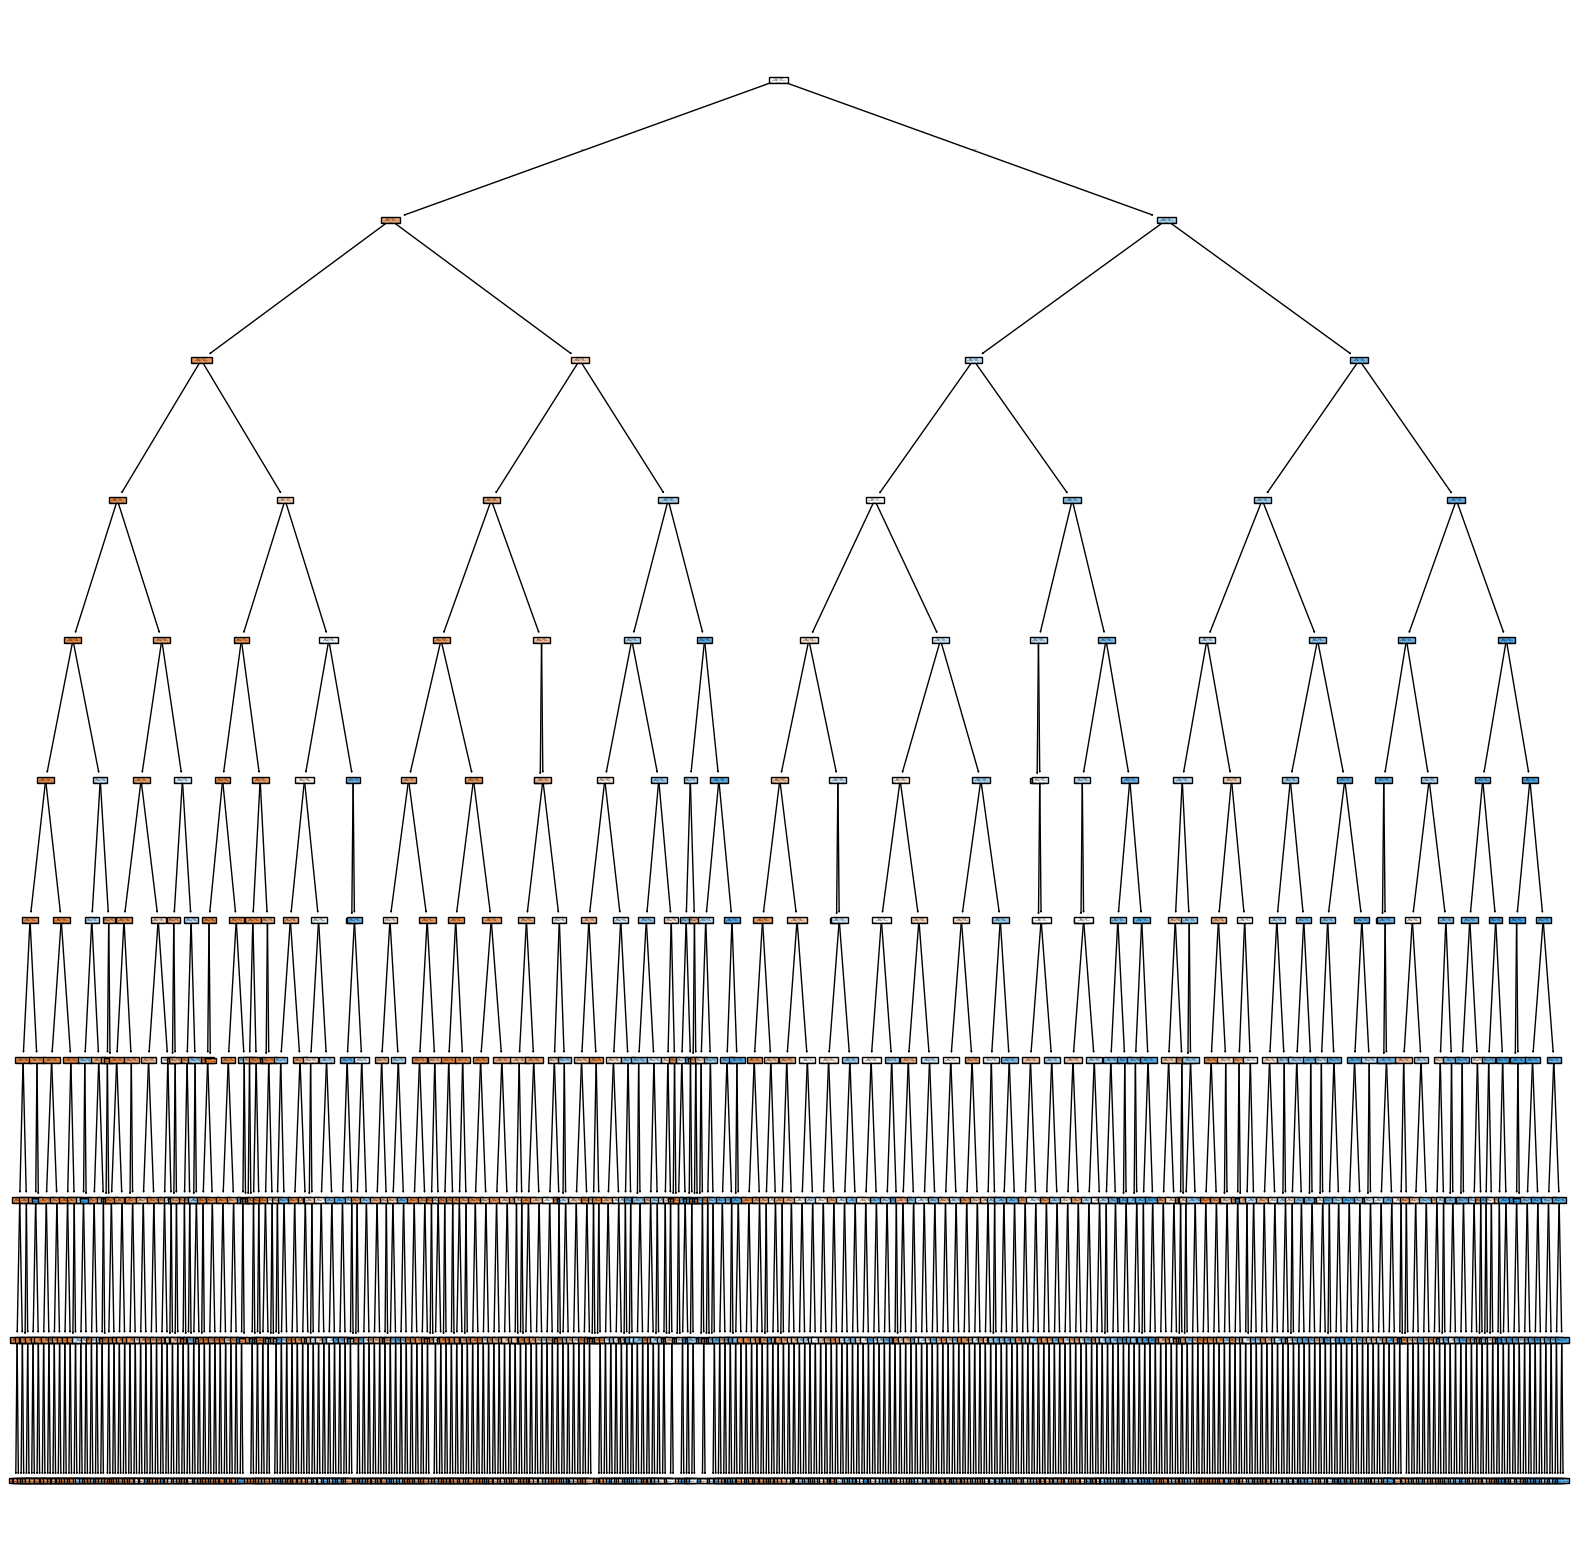

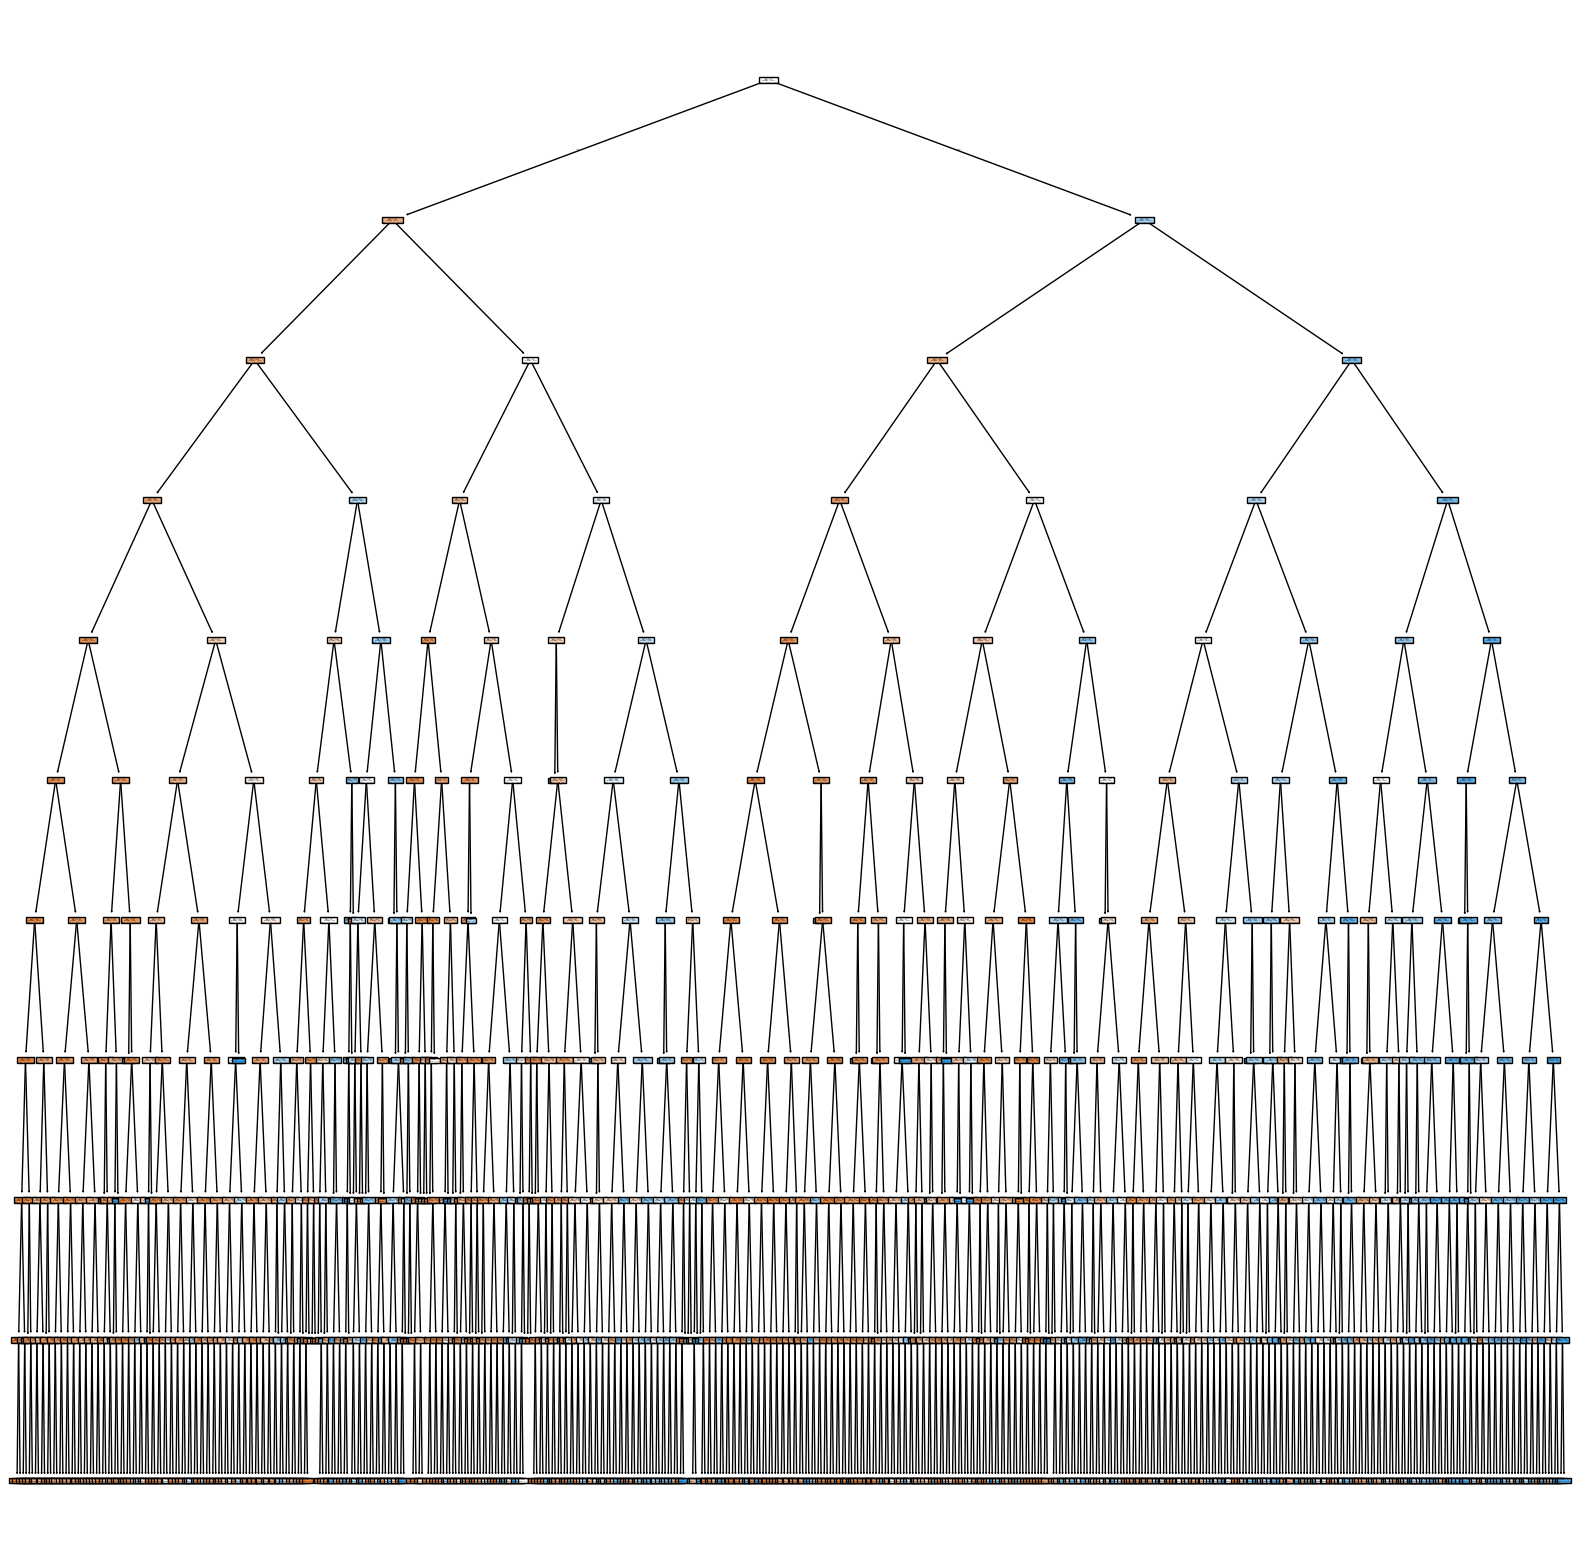

In [10]:
from sklearn import tree
from sklearn.tree import plot_tree

# Print the number of trees in the RF model
print("Number of trees in the RF model: ",len(classifier.estimators_))

# Plot the first 5 Trees in the FR model
#for i in range(np.min(len(classifier.estimators_),5)):
for i in range(5):
  # Extract each individual decision tree from the Random Forest
  individual_tree = classifier.estimators_[i]
  # Visualize each decision tree
  plt.figure(figsize=(20, 20))
  plot_tree(individual_tree, filled=True)

plt.show()



In [11]:
# Predictions on the test set
Y_pred = classifier.predict(X_test)

In [ ]:
import joblib
joblib.dump(classifier, 'random_forest_heart.pkl')

In [ ]:
files.download('random_forest_heart.pkl')

In [12]:
# Confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)
cr = classification_report(y_test, Y_pred)
print(cm)
print(cr)

[[36365  9593]
 [ 4956 41001]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83     45958
           1       0.81      0.89      0.85     45957

    accuracy                           0.84     91915
   macro avg       0.85      0.84      0.84     91915
weighted avg       0.85      0.84      0.84     91915



In [ ]:
# User input for prediction
def get_user_input():
    print("Provide the following details for prediction:")
    user_input = {
        "HighBP": int(input("Enter High Blood Pressure (0 for No, 1 for Yes): ")),
        "HighChol": int(input("Enter High Cholesterol (0 for No, 1 for Yes): ")),
        "BMI": float(input("Enter BMI: ")),
        "Smoker": int(input("Enter Smoker (0 for No, 1 for Yes): ")),
        "Stroke": int(input("Enter Stroke (0 for No, 1 for Yes): ")),
        "Diabetes": int(input("Enter Diabetes (0 for No, 1 for Yes): ")),
        "DiffWalk": int(input("Enter Difficulty Walking (0 for No, 1 for Yes): ")),
        "Sex": int(input("Enter Sex (0 for Female, 1 for Male): ")),
        "Age": int(input("Enter Age (in years): ")),
        "Education": int(input("Enter Education Level (1-6, 1 being never attended school): ")),
        "Income": int(input("Enter Income Level (1-8, 1 being lowest income): ")),
        "GenHlth": int(input("Enter General Health (1-5, 1 being excellent): ")),
        "MentHlth": int(input("Enter Mental Health (0-30, 0 being no mental health issues): ")),
        "PhysHlth": int(input("Enter Physical Health (0-30, 0 being no physical health issues): ")),}
    return user_input

# Convert user input into a DataFrame
user_input_data = get_user_input()
user_input_df = pd.DataFrame([user_input_data])

# Scale numerical inputs
numerical_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
user_input_df[numerical_columns] = scaler.transform(user_input_df[numerical_columns])

# Predict the outcome
prediction = classifier.predict(user_input_df[selected_features])
result = "Heart Disease or Attack Risk is High" if prediction[0] == 1 else "Heart Disease or Attack Risk is Low"

# Display the result
print("\nPrediction:", result)

Provide the following details for prediction:
Enter High Blood Pressure (0 for No, 1 for Yes): 0
Enter High Cholesterol (0 for No, 1 for Yes): 0
Enter BMI: 25
Enter Smoker (0 for No, 1 for Yes): 0
Enter Stroke (0 for No, 1 for Yes): 0
Enter Diabetes (0 for No, 1 for Yes): 0
Enter Difficulty Walking (0 for No, 1 for Yes): 0
Enter Sex (0 for Female, 1 for Male): 0
Enter Age (in years): 25
Enter Education Level (1-6, 1 being never attended school): 5
Enter Income Level (1-8, 1 being lowest income): 6
Enter General Health (1-5, 1 being excellent): 4
Enter Mental Health (0-30, 0 being no mental health issues): 10
Enter Physical Health (0-30, 0 being no physical health issues): 0

Prediction: Heart Disease or Attack Risk is Low
